In [1]:
import matplotlib.pyplot as plt; 
import numpy as np; 
import csv;
import os; 

In [2]:
ethnicity_list = ["All races", "White", "Black", \
                  "Other (American Indian/AK Nativ",  \
                  "Other unspecified (1978-1991)"]

cancer_types_list = ["Breast", "Prostate", "Lung and Bronchus"]
analysis_type = ["Count", "Percentage"]
gender_types_list = ["Male and female", "Male", "Female"]

SEER_Stat_files = ["Morbidity"]

In [3]:
# Make tables of CDC data for each cancer type, for each data type
def parse_data_CDC(file, cancer_type, gender_type, ethnicity_list, analysis_type):
    
    # Build filename to look in the Data archive
    filename = os.path.join("Data", "SEER_Stat", file + ".csv")
    
    data = []; x = []; 
    # Open CDC files and read in all lines
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close() 
    
    # Parse data into variables
    for i in range(6): x.append(0)
    
    # Build lists for each 
    year = []; all_races = []; white = []; black = []; asian = []; unspecified = []; 
    for i in range(len(data)):
        x = data[i].split(",")    
        if x[0] == cancer_type:
            if x[2] == gender_type:
                
                # Remove parentheses from "Other ...
                check_ethnicity = list(x[3]); 
                if (check_ethnicity[-1] == "e" and check_ethnicity[-2] == "v"):
                    x[3] = "".join(check_ethnicity[1:-1])  
                
                if x[1] != "1969-2015": 
                    x[1] = int(x[1]); x[-1] = int(x[-1])
                    
                    if analysis_type == "Percentage": 
                        if x[3] == "All races": 
                            annual_total = x[4];
                            if annual_total == 0:
                                annual_total = 1;
                    else: annual_total = 1; 
                    
                    x[-1] = x[-1]/annual_total;

                    if x[3] == ethnicity_list[0]: all_races.append(x[-1]); year.append(x[1])
                    if x[3] == ethnicity_list[1]: white.append(x[-1])
                    if x[3] == ethnicity_list[2]: black.append(x[-1])
                    if x[3] == ethnicity_list[3]: asian.append(x[-1])    
                    if x[3] == ethnicity_list[4]: unspecified.append(x[-1])
                    
    # Build table of all percentages
    table = np.array([year, white, black, asian, unspecified])
    table = np.transpose(table)
    title = (file + " " + analysis_type + " of " + cancer_type + " Cancer for " + gender_type)
    filename = os.path.join("Tables", title + ".csv")
    
    # Open file to clear contents, then write the table
    open(filename, "w").close()
    with open(filename, "w") as output:
        writer = csv.writer(output, lineterminator='\n')
        writer.writerows(table)
    
    print(file + " " + cancer_type)
        
    return(year, white, black, asian, unspecified, title)
    

In [4]:
# Make tables of CDC data for each cancer type, for each data type
def scatter_plot(year, white, black, asian, unspecified, title, plot_number):
    ax = fig.add_subplot(plot_number);
    
    plt.scatter(year,white, label = "Caucasian")
    plt.scatter(year,black, label = "African American")
    plt.scatter(year,asian, label = "Asian and Native American")
    plt.scatter(year,unspecified, label = "Unspecified")
    plt.title(title)
    plt.legend(loc='upper left')
    

Morbidity Breast
Morbidity Breast
Morbidity Breast
Morbidity Breast
Morbidity Breast
Morbidity Breast


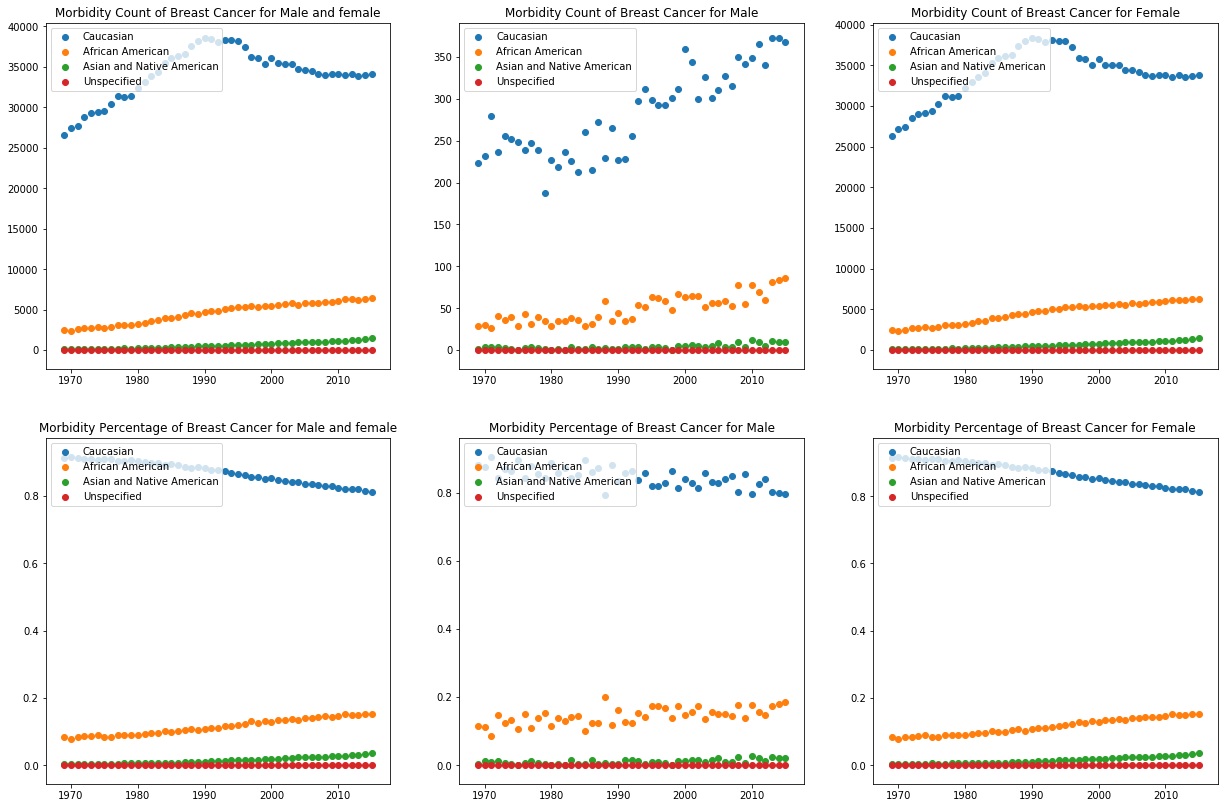

Morbidity Prostate
Morbidity Prostate
Morbidity Prostate
Morbidity Prostate
Morbidity Prostate
Morbidity Prostate


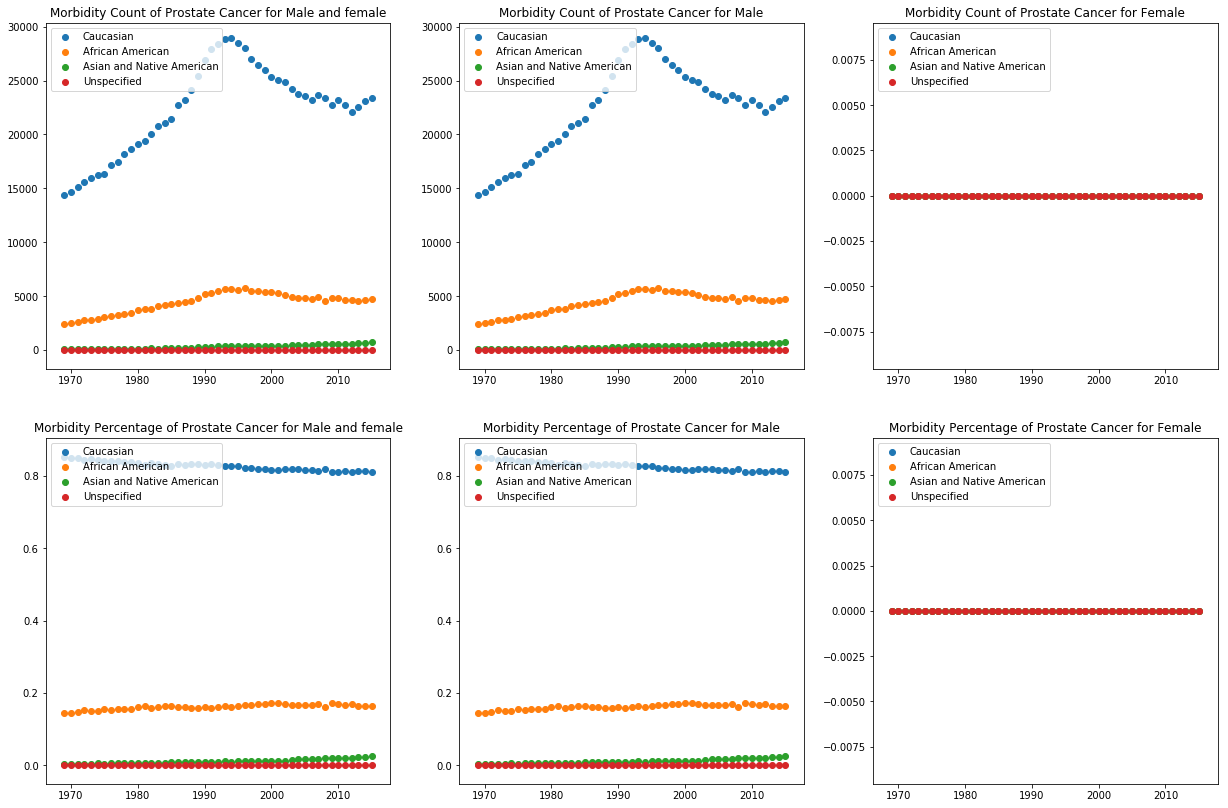

Morbidity Lung and Bronchus
Morbidity Lung and Bronchus
Morbidity Lung and Bronchus
Morbidity Lung and Bronchus
Morbidity Lung and Bronchus
Morbidity Lung and Bronchus


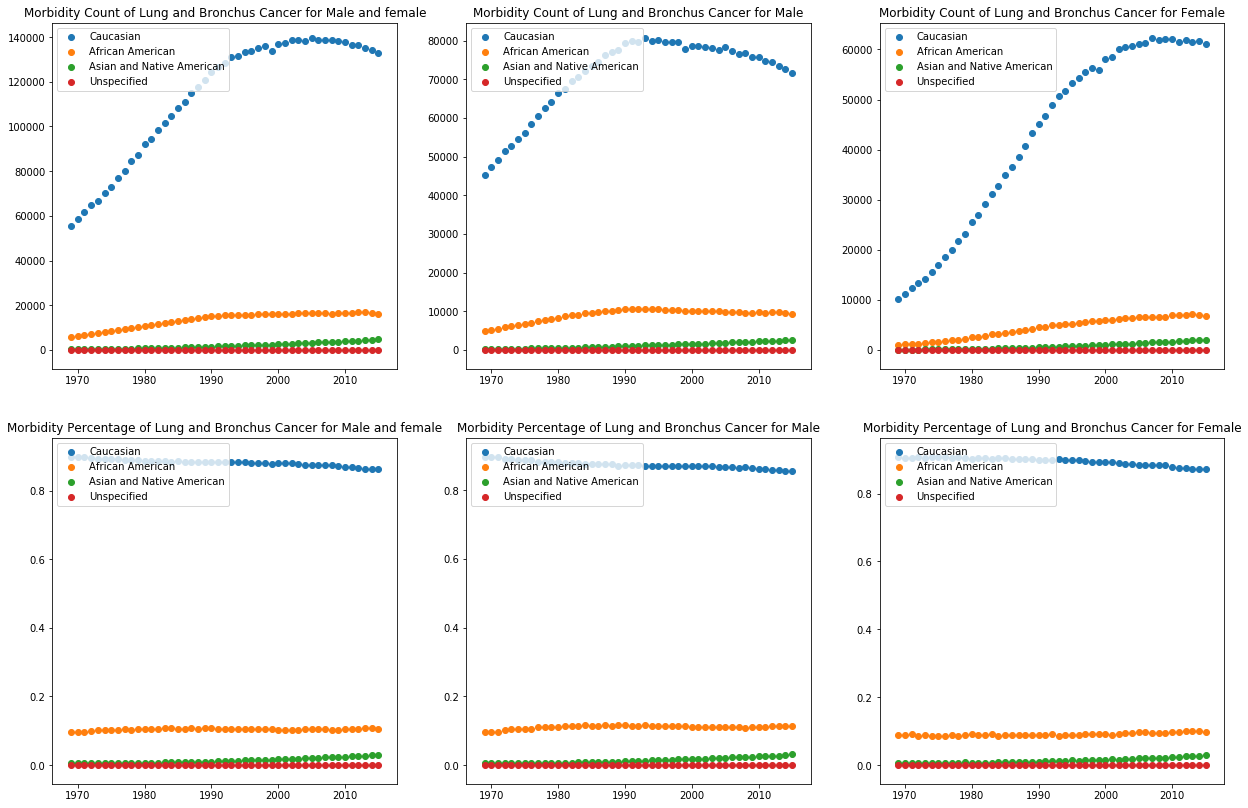

In [5]:

for i in range(len(cancer_types_list)):
    
    box_size = 7; 
    fig = plt.figure(1.5, figsize=(3*box_size, 2*box_size)); 
    plot_number = 230;

    for j in range(len(analysis_type)):
        for k in range(len(gender_types_list)):
            year, white, black, asian, unspecified, title = \
            parse_data_CDC(SEER_Stat_files[0], cancer_types_list[i], \
            gender_types_list[k], ethnicity_list, analysis_type[j])
            
            plot_number = plot_number+1;
            
            scatter_plot(year, white, black, asian, unspecified, title, plot_number)
    
    saved_filename = os.path.join("Figures", title + '.jpg')
    plt.savefig(saved_filename, bbox_inches='tight') 
    plt.show()

